In [ ]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates

from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('datasets/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.050,99.980,95.790,99.980,126000.00,4.940000e+05
1990-12-20,99.98,104.300,104.390,99.980,104.390,19700.00,8.400000e+04
1990-12-21,104.39,109.070,109.130,103.730,109.130,2800.00,1.600000e+04
1990-12-24,109.13,113.570,114.550,109.130,114.550,3200.00,3.100000e+04
1990-12-25,114.55,120.090,120.250,114.550,120.250,1500.00,6.000000e+03
...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07


In [ ]:
data_new = data['1995-01':'2024-09'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
# 计算000001上证指数日收益率 两种：
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return
Day,,,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,23451800.00,1.806930e+08,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,42222000.00,3.069230e+08,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,43012300.00,3.015330e+08,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,48748200.00,3.537580e+08,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,50985100.00,3.985190e+08,-0.023035
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


In [ ]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Month_data.reset_index(inplace = True)
Month_data.rename(columns = {'Day':'month'}, inplace = True)
Month_data.set_index('month', inplace = True)
Month_data

,Raw_return
month,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [ ]:
Quarter_data = data_new.resample('QE')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Quarter_data.reset_index(inplace = True)
Quarter_data.rename(columns = {'Day':'Q'}, inplace = True)
Quarter_data.set_index('Q', inplace = True)
Quarter_data

,Raw_return
Q,
1995-03-31,-0.001466
1995-06-30,-0.025258
1995-09-30,0.145660
1995-12-31,-0.231358
1996-03-31,0.001981
...,...
2023-09-30,-0.028603
2023-12-31,-0.043575
2024-03-31,0.022263


In [ ]:
Year_data = data_new.resample('YE')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Year_data.reset_index(inplace = True)
Year_data.rename(columns = {'Day':'Year'}, inplace = True)
Year_data.set_index('Year', inplace = True)
Year_data

,Raw_return
Year,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


In [ ]:
inflation = pd.read_csv('datasets/inflation.csv')
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation.sort_values(by=['month'],axis=0,ascending=True)

,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2024-05-31,0.3
2024-06-30,0.2
2024-07-31,0.5


# 月度数据的预测

A simple linear regression of an asset return on one or a few lagged predictors of interest is the most popular econometric approach for testing for return predictability. For simplicity, consider a univariate predictive regression of the period- $(t + 1)$ stock market return $r_{t+1}$ on a single predictor variable $x_t$:
$$
r_{t+1}=\alpha+\beta x_{t}+\varepsilon_{t+1}
$$
where $\varepsilon_{t+1}$ is a zero-mean, unpredictable disturbance term. When $x_t$ is the inflation rate, dividend yield, book-to-price ratio, or turnover. Many researchers find that $\beta$ is significantly different from zero; that is, there is in-sample evidence of stock market return predictability.

* H0:$\beta = 0$
* H1:$\beta \ne 0$(我们需要通过理论分析，得出$\beta$的符号)

## ICAPM 模型的简化版

$$
r_{t} = \gamma E_{t-1}(\sigma^2_{t})
$$

$$
r_{t} = \gamma E_{t-1}(cov(r,\Delta c))
$$

$\gamma$就是相对风险厌恶系数。
这里涉及到一个概念就是 **股权溢价之谜**

In [ ]:
market_variance = data_new.resample('ME').apply({
    'Raw_return':
    lambda x: sum(x**2)
})
market_variance.reset_index(inplace=True)
market_variance.rename(columns={'Day':'month','Raw_return':'RV'},inplace=True)
market_variance.set_index('month',inplace=True)
market_variance

# market_variance <- daily_data[,.(MV = sum(Raw_return^2)),by = 'month'] This is R code

,RV
month,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2024-05-31,0.000915
2024-06-30,0.000642
2024-07-31,0.001441


In [ ]:
reg_data = pd.merge(Month_data,market_variance,on = 'month')
reg_data = pd.merge(reg_data,inflation,on = 'month')
reg_data
# Output reg_data to reg_data.csv
reg_data.to_csv('datasets/reg_data.csv')
# Output reg_data to reg_data.xlsx
reg_data.to_excel('datasets/reg_data.xlsx')


,Raw_return,RV,cpi
month,,,
1995-01-31,-0.131631,0.005695,24.1
1995-02-28,-0.023694,0.018086,22.4
1995-03-31,0.177803,0.013378,21.3
1995-04-30,-0.103552,0.008281,20.7
1995-05-31,0.207922,0.148387,20.3
...,...,...,...
2024-05-31,-0.005801,0.000915,0.3
2024-06-30,-0.038684,0.000642,0.2
2024-07-31,-0.009656,0.001441,0.5


## 作图 Plot

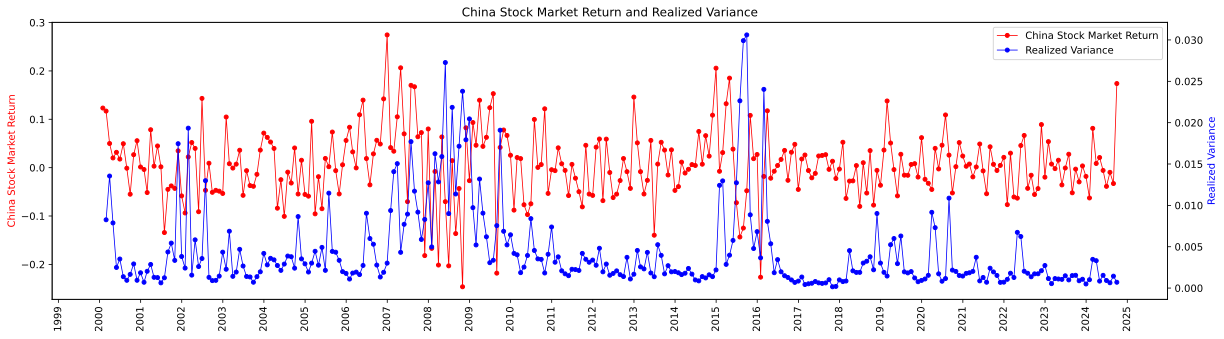

In [ ]:
reg_data_plot = reg_data['2000-01':'2024-09'].copy()
# Plot the China's stock market return and inflation into one graph
fig, ax1 = plt.subplots(figsize=(20,5))
# the linewidth and marker size are set to be very small
ax1.plot(reg_data_plot['Raw_return'],color='red',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='China Stock Market Return')
ax1.set_ylabel('China Stock Market Return',color='red')
#ax1.set_xlabel('Month')

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)


ax2 = ax1.twinx()
ax2.plot(reg_data_plot['RV'].shift(1),color='blue',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Realized Variance')

ax2.set_ylabel('Realized Variance',color='blue')

plt.title('China Stock Market Return and Realized Variance')

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show();

## 描述性统计 Summary


In [ ]:
reg_data['RV'].describe().round(5)

count    357.00000
mean       0.00549
std        0.00971
min        0.00016
25%        0.00155
50%        0.00277
75%        0.00605
max        0.14839
Name: RV, dtype: float64

In [ ]:
reg_data['RV'].skew()
reg_data['RV'].kurt()

9.699442671747752

133.47698299206684

## OLS 回归结果

In [ ]:
reg_data['lRV'] = reg_data['RV'].shift(1)
model_cpi = smf.ols('Raw_return ~ lRV',
                 data=reg_data['1995-01':'2024-09']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.417
Date:                Tue, 29 Oct 2024   Prob (F-statistic):              0.235
Time:                        10:05:08   Log-Likelihood:                 414.52
No. Observations:                 356   AIC:                            -825.0
Df Residuals:                     354   BIC:                            -817.3
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0103      0.005      2.171      0.0

In [ ]:
reg_data['lcpi'] = reg_data['cpi'].shift(2)
model_cpi = smf.ols('Raw_return ~ lcpi',
                 data=reg_data['2000-01':'2024-09']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     9.517
Date:                Tue, 29 Oct 2024   Prob (F-statistic):            0.00223
Time:                        10:05:08   Log-Likelihood:                 371.45
No. Observations:                 297   AIC:                            -738.9
Df Residuals:                     295   BIC:                            -731.5
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0204      0.007      3.021      0.0

In [ ]:
model_twovariables = smf.ols('Raw_return ~ lRV + lcpi',
                 data=reg_data['2000-01':'2024-09']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_twovariables.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     5.340
Date:                Tue, 29 Oct 2024   Prob (F-statistic):            0.00527
Time:                        10:05:08   Log-Likelihood:                 371.82
No. Observations:                 297   AIC:                            -737.6
Df Residuals:                     294   BIC:                            -726.6
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0226      0.007      3.032      0.0

## 季度结果

In [ ]:
Q_reg_data = reg_data['1995-01':'2024-09'].resample('QE').apply({
    'Raw_return':
    lambda x: np.prod(1+x) - 1,
    'RV':
    lambda x: sum(x)
})
Q_reg_data

,Raw_return,RV
month,,
1995-03-31,-0.001466,0.037159
1995-06-30,-0.025258,0.165852
1995-09-30,0.145660,0.022866
1995-12-31,-0.231358,0.014829
1996-03-31,0.001981,0.021250
...,...,...
2023-09-30,-0.028603,0.003941
2023-12-31,-0.043575,0.002575
2024-03-31,0.022263,0.007629


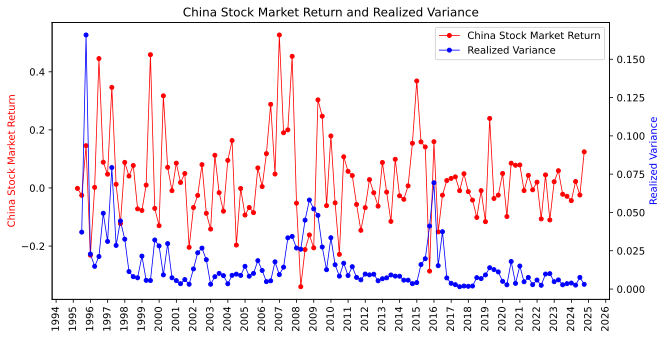

In [ ]:
# Plot the China's stock market return and inflation into one graph
fig, ax1 = plt.subplots(figsize=(10,5))
# the linewidth and marker size are set to be very small
ax1.plot(Q_reg_data['Raw_return'],color='red',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='China Stock Market Return')
ax1.set_ylabel('China Stock Market Return',color='red')
#ax1.set_xlabel('Month')

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

ax2 = ax1.twinx()
ax2.plot(Q_reg_data['RV'].shift(1),color='blue',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Realized Variance')

ax2.set_ylabel('Realized Variance',color='blue')

plt.title('China Stock Market Return and Realized Variance')

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# save figure
fig.savefig('images/China Stock Market Return and Realized Variance Quarter.png',dpi = 1000,bbox_inches='tight')

plt.show();

In [ ]:
Q_reg_data['lRV'] = Q_reg_data['RV'].shift(1)
model_qcpi = smf.ols('Raw_return ~ lRV',
                 data=Q_reg_data['2000-01':'2024-09']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_qcpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.02161
Date:                Tue, 29 Oct 2024   Prob (F-statistic):              0.883
Time:                        10:05:11   Log-Likelihood:                 52.471
No. Observations:                  99   AIC:                            -100.9
Df Residuals:                      97   BIC:                            -95.75
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0166      0.020      0.832      0.4

## 长期预测 Long Horizon Forecast

$$
r_{t+1} + r_{t+2} + r_{t+3}  =\alpha+\beta x_{t}+\varepsilon_{t+1}
$$

In [ ]:
reg_data['next_ret'] = reg_data['Raw_return'].shift(-1) + 1
reg_data['next_ret2'] = reg_data['Raw_return'].shift(-2) + 1
reg_data['next_ret3'] = reg_data['Raw_return'].shift(-3) + 1
reg_data['future_3month_return'] = reg_data['next_ret'] * reg_data['next_ret2'] * reg_data['next_ret3'] - 1
reg_data

,Raw_return,RV,cpi,lRV,lcpi,next_ret,next_ret2,next_ret3,future_3month_return
month,,,,,,,,,
1995-01-31,-0.131631,0.005695,24.1,NaN,NaN,0.976306,1.177803,0.896448,0.030822
1995-02-28,-0.023694,0.018086,22.4,0.005695,NaN,1.177803,0.896448,1.207922,0.275370
1995-03-31,0.177803,0.013378,21.3,0.018086,24.1,0.896448,1.207922,0.900173,-0.025258
1995-04-30,-0.103552,0.008281,20.7,0.013378,22.4,1.207922,0.900173,1.103032,0.199369
1995-05-31,0.207922,0.148387,20.3,0.008281,21.3,0.900173,1.103032,1.040716,0.033347
...,...,...,...,...,...,...,...,...,...
2024-05-31,-0.005801,0.000915,0.3,0.001542,0.1,0.961316,0.990344,0.967151,-0.079240
2024-06-30,-0.038684,0.000642,0.2,0.000915,0.3,0.990344,0.967151,1.173908,0.124383
2024-07-31,-0.009656,0.001441,0.5,0.000642,0.3,0.967151,1.173908,NaN,NaN


In [ ]:
model_cpi_3month = smf.ols('future_3month_return ~ RV',
                 data=reg_data['2000-01':'2024-09']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi_3month.summary())

                             OLS Regression Results                             
Dep. Variable:     future_3month_return   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.003
Method:                   Least Squares   F-statistic:                  0.008066
Date:                  Tue, 29 Oct 2024   Prob (F-statistic):              0.928
Time:                          10:05:11   Log-Likelihood:                 164.02
No. Observations:                   294   AIC:                            -324.0
Df Residuals:                       292   BIC:                            -316.7
Df Model:                             1                                         
Covariance Type:                    HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.015

# 预测波动率

这里的结果显示出波动率具有非常高的自相关性，类比前一次课的通货膨胀。

In [ ]:
model_mv = smf.ols('RV ~ lRV + lcpi',
                 data=reg_data['2000-01':'2024-09']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_mv.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     30.98
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           6.16e-13
Time:                        10:05:11   Log-Likelihood:                 1214.9
No. Observations:                 297   AIC:                            -2424.
Df Residuals:                     294   BIC:                            -2413.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0013      0.000      3.118      0.0